    Abgabe Marquardt 3706017 Data Exploration Project

In [156]:
# imports

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import chi2, f_classif, RFE
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report, roc_auc_score, roc_curve

     START EXPLORATION

In [157]:
# Datensatz laden
path = "mushrooms.csv"
mushroom_data = pd.read_csv(path)

In [158]:
# Die ersten Zeilen des Datensatzes anzeigen
print(mushroom_data.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [159]:
# Die Spaltennamen des Datensatzes anzeigen
print(mushroom_data.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [160]:
# Allgemeine Informationen über den Datensatz anzeigen
print(mushroom_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [161]:
# Statistische Zusammenfassung des Datensatzes anzeigen
print(mushroom_data.describe())

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

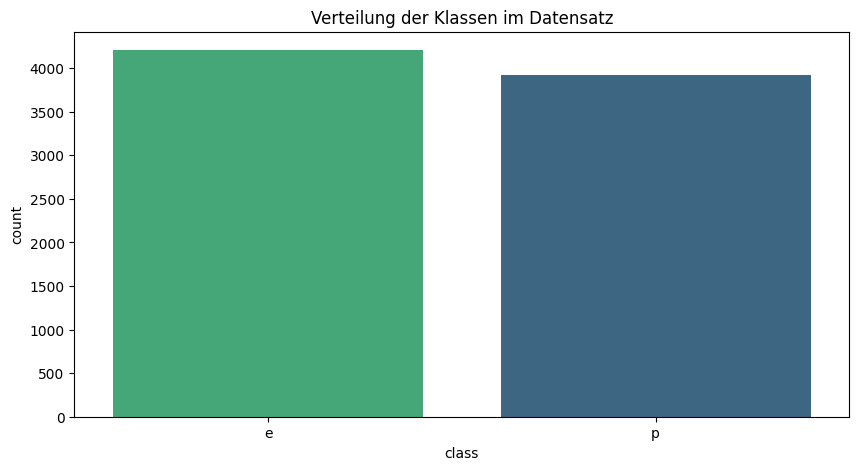

In [162]:
# Die Häufigkeit der Klassen ermitteln und nach Größe sortieren
class_counts = mushroom_data['class'].value_counts().sort_values(ascending=False).index

# Visualisierung der Verteilung der Klassen
plt.figure(figsize=(10, 5))
sns.countplot(x='class', hue='class', data=mushroom_data, palette='viridis', order=class_counts, legend=False)
plt.title('Verteilung der Klassen im Datensatz')
plt.show()

In [163]:
# Übersicht über die am häufigsten vorkommenden Ausprägungen der Pilz-Eigenschaften
print("Häufigkeit der Ausprägungen der Pilz-Eigenschaften:")
for col in mushroom_data.columns:
    if col != 'class':
        print(f"{col}:\n{mushroom_data[col].value_counts()}\n")

Häufigkeit der Ausprägungen der Pilz-Eigenschaften:
cap-shape:
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

cap-surface:
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

cap-color:
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

bruises:
bruises
f    4748
t    3376
Name: count, dtype: int64

odor:
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

gill-attachment:
gill-attachment
f    7914
a     210
Name: count, dtype: int64

gill-spacing:
gill-spacing
c    6812
w    1312
Name: count, dtype: int64

gill-size:
gill-size
b    5612
n    2512
Name: count, dtype: int64

gill-color:
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64

stalk-shape:
sta

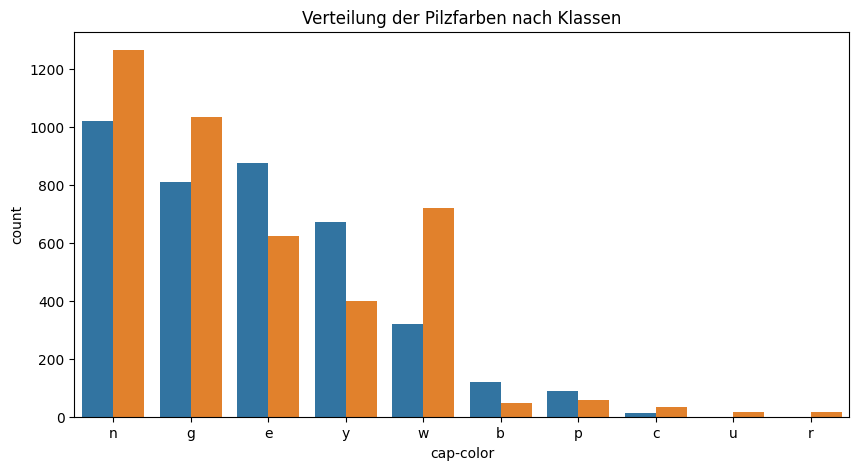

In [164]:
# Die Häufigkeit der Klassen ermitteln und nach Größe sortieren
cap_color_counts = mushroom_data['cap-color'].value_counts().sort_values(ascending=False).index

# Visualisierung der Verteilung von Pilzfarben nach Klassen
plt.figure(figsize=(10, 5))
sns.countplot(x='cap-color', hue='class', data=mushroom_data, order=cap_color_counts, legend=False)
plt.title('Verteilung der Pilzfarben nach Klassen')
plt.show()

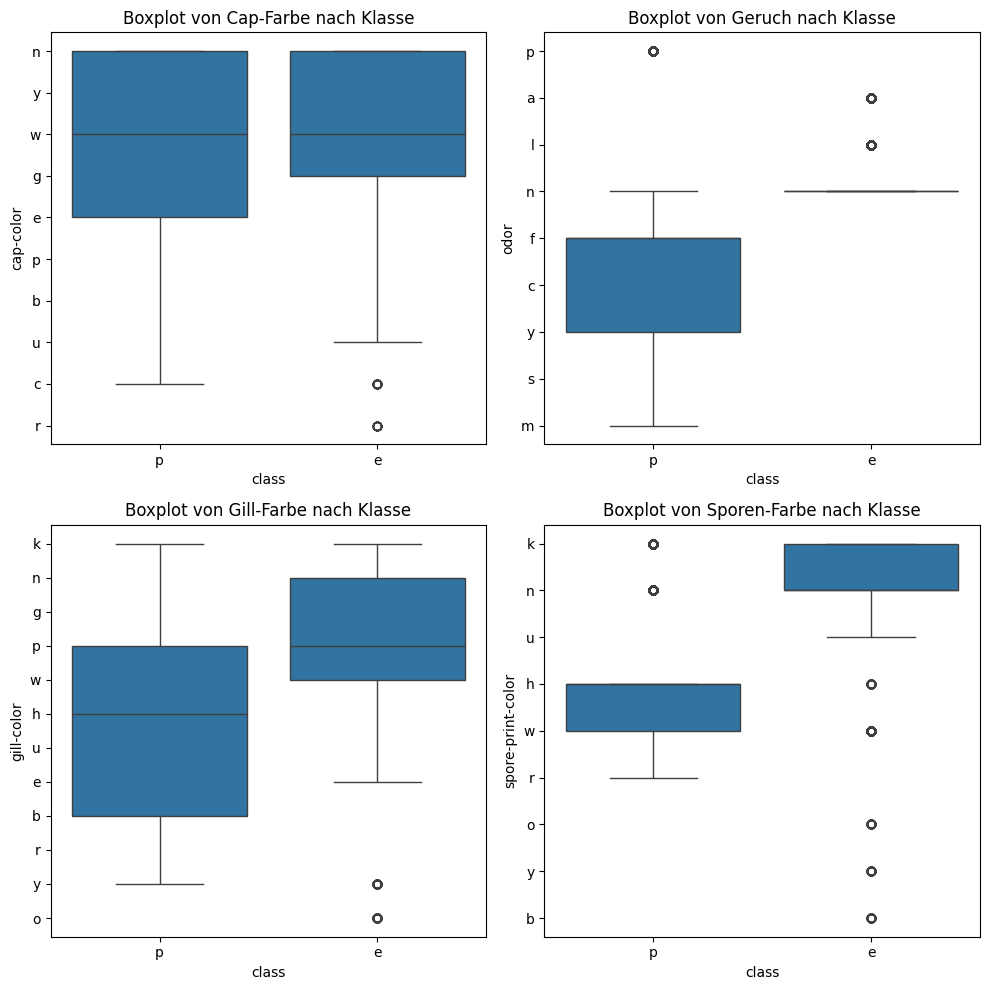

In [165]:
# Boxplots für ausgewählte Merkmale erstellen
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='class', y='cap-color', data=mushroom_data)
plt.title('Boxplot von Cap-Farbe nach Klasse')

plt.subplot(2, 2, 2)
sns.boxplot(x='class', y='odor', data=mushroom_data)
plt.title('Boxplot von Geruch nach Klasse')

plt.subplot(2, 2, 3)
sns.boxplot(x='class', y='gill-color', data=mushroom_data)
plt.title('Boxplot von Gill-Farbe nach Klasse')

plt.subplot(2, 2, 4)
sns.boxplot(x='class', y='spore-print-color', data=mushroom_data)
plt.title('Boxplot von Sporen-Farbe nach Klasse')

plt.tight_layout()
plt.show()

     START MACHINELLES LERNEN
    

In [166]:
X=mushroom_data.drop('class', axis=1) 
y=mushroom_data['class'] 
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


Aufteilung Datensatz

In [167]:
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])

Encoder_y = LabelEncoder()
y = Encoder_y.fit_transform(y)

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=100)
print(f"Number of samples for training set:{X_train.shape}")
print(f"Number of samples for test set:{X_test.shape}")

Number of samples for training set:(6499, 22)
Number of samples for test set:(1625, 22)


In [182]:
# Initialisiere den RandomForestClassifier
randomForest = RandomForestClassifier()

# Feature selection using Recursive Feature Elimination (RFE)
rfe = RFE(estimator=randomForest, n_features_to_select=10, step=1)
rfe.fit(X_train, Y_train)
selected_features_rfe = X.columns[rfe.support_]
rfe_scores = rfe.support_.astype(int)
'''
RFE outputs bool-value for features wheter important = True or False
'''

# Feature selection using Fisher score
fisher_scores, _ = f_classif(X, y)
top_fisher_features = [X.columns[i] for i in np.argsort(fisher_scores)[-10:]]

# Feature selection using chi-square-score
chi2_scores, _ = chi2(X, y)
top_chi2_features = [X.columns[i] for i in np.argsort(chi2_scores)[-10:]]

# Plotting
plt.figure(figsize=(15, 8))


plt.subplot(1, 3, 1)
plt.barh(range(len(rfe_scores)), rfe_scores)
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('RFE Feature Importance')

plt.subplot(1, 3, 2)
plt.barh(range(len(fisher_scores)), fisher_scores)
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Fisher Score')
plt.ylabel('Features')
plt.title('Fisher Score Feature Importance')

plt.subplot(1, 3, 3)
plt.barh(range(len(chi2_scores)), chi2_scores)
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Chi-Square Score')
plt.ylabel('Features')
plt.title('Chi-Square Score Feature Importance')

plt.tight_layout()
plt.show()


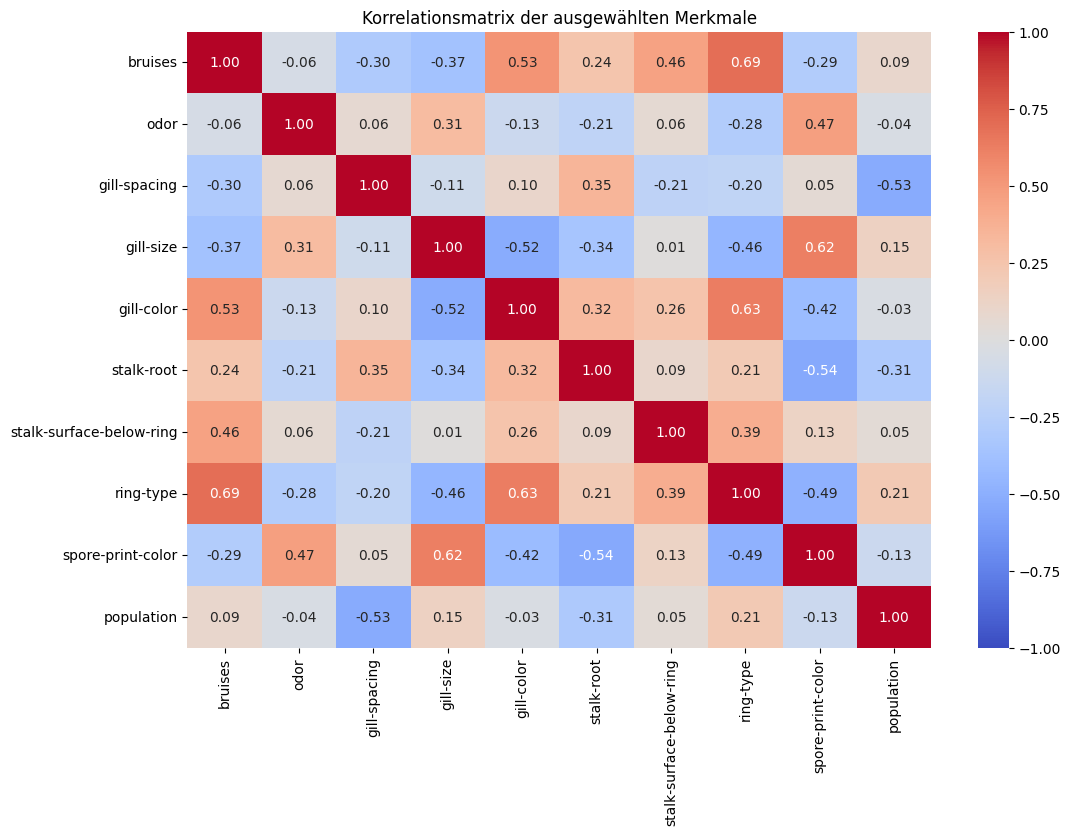

In [180]:
# Heatmap für die RFE-Merkmale
selected_features = ['bruises', 'odor', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-root', 'stalk-surface-below-ring', 'ring-type',
       'spore-print-color', 'population']

# Erstellen eines Kopie des Datensatzes, um Änderungen vorzunehmen
mushroom_data_encoded = mushroom_data.copy()

# Label-Encoding für kategoriale Merkmale
label_encoder = LabelEncoder()
for feature in selected_features:
    mushroom_data_encoded[feature] = label_encoder.fit_transform(mushroom_data_encoded[feature])

# Berechnen der Korrelationsmatrix
correlation_matrix = mushroom_data_encoded[selected_features].corr()

# Plotting der Korrelationsmatrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Korrelationsmatrix der ausgewählten Merkmale')
plt.show()


     Dummy Classifier

In [ ]:
class DummyClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.most_frequent_class = None

    def fit(self, X, y):
        # Find the most frequent class
        self.most_frequent_class = np.argmax(np.bincount(y))
        return self

    def predict(self, X):
        # Return the most frequent class for all samples
        return np.full(X.shape[0], self.most_frequent_class)

# Datensatz aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Dummy-Classifier initialisieren und trainieren
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)

# Vorhersagen machen
y_pred = dummy_clf.predict(X_test)

# Genauigkeit berechnen
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit des Dummy-Classifiers: {accuracy:.2f}")

Genauigkeit des Dummy-Classifiers: 0.50


     K-Nearest-Neighbour

In [177]:
'''
kNN und Error-Rate für jedes kNN
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Definieren Sie eine Liste von k-Werten, die Sie untersuchen möchten
k_values = list(range(1, 101))

# Initialisieren Sie eine leere Liste, um die Genauigkeiten für jedes k zu speichern
accuracies = []

# Iterieren Sie über die k-Werte
for k in k_values:
    # Initialisieren Sie den kNN-Klassifikator mit dem aktuellen k-Wert
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Trainieren Sie den Klassifikator auf den Trainingsdaten
    knn.fit(X_train, Y_train)
    
    # Machen Sie Vorhersagen auf den Testdaten
    y_pred = knn.predict(X_test)
    
    # Berechnen Sie die Genauigkeit und speichern Sie sie
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies.append(accuracy)

# Ausgabe der Genauigkeiten für jeden k-Wert
for k, accuracy in zip(k_values, accuracies):
    print(f"k = {k} -> Genauigkeit = {accuracy}")


k = 1 -> Genauigkeit = 0.5033846153846154
k = 2 -> Genauigkeit = 0.5033846153846154
k = 3 -> Genauigkeit = 0.5138461538461538
k = 4 -> Genauigkeit = 0.5089230769230769
k = 5 -> Genauigkeit = 0.5046153846153846
k = 6 -> Genauigkeit = 0.4947692307692308
k = 7 -> Genauigkeit = 0.5181538461538462
k = 8 -> Genauigkeit = 0.5070769230769231
k = 9 -> Genauigkeit = 0.5095384615384615
k = 10 -> Genauigkeit = 0.5095384615384615
k = 11 -> Genauigkeit = 0.5101538461538462
k = 12 -> Genauigkeit = 0.5003076923076923
k = 13 -> Genauigkeit = 0.5033846153846154
k = 14 -> Genauigkeit = 0.5003076923076923
k = 15 -> Genauigkeit = 0.5070769230769231
k = 16 -> Genauigkeit = 0.4966153846153846
k = 17 -> Genauigkeit = 0.4898461538461538
k = 18 -> Genauigkeit = 0.4929230769230769
k = 19 -> Genauigkeit = 0.49846153846153846
k = 20 -> Genauigkeit = 0.4867692307692308
k = 21 -> Genauigkeit = 0.5003076923076923
k = 22 -> Genauigkeit = 0.5027692307692307
k = 23 -> Genauigkeit = 0.49538461538461537
k = 24 -> Genauigk

In [ ]:
'''
XGBoost und Error-Rate für jeden Booster

Genauigkeit der Booster: 1 - Summe der Fehler jeweils von max_depth von 3, 5 und 7
'''

# Definieren einer Liste von Booster-Parametern
booster_params = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}

# Initialisieren einer leeren Liste, um die Genauigkeiten für jeden Booster zu speichern
accuracies = []

# Iterieren über die Booster-Parameter
for max_depth in booster_params['max_depth']:
    for learning_rate in booster_params['learning_rate']:
        # Initialisieren des XGBoost-Klassifikators mit den aktuellen Parametern
        xgb_classifier = xgb.XGBClassifier(max_depth=max_depth, learning_rate=learning_rate)
        
        # Trainieren des Klassifikators auf den Trainingsdaten
        xgb_classifier.fit(X_train, Y_train)
        
        # Vorhersagen auf den Testdaten
        y_pred = xgb_classifier.predict(X_test)
        
        # Berechnung der Genauigkeit
        accuracy = accuracy_score(Y_test, y_pred)
        accuracies.append(accuracy)

# Ausgabe der Genauigkeiten für jeden Booster
for i, (max_depth, learning_rate) in enumerate(zip(booster_params['max_depth'], booster_params['learning_rate'])):
    print(f"Booster {i+1}: max_depth = {max_depth}, learning_rate = {learning_rate}, Genauigkeit = {accuracies[i]}")


Booster 1: max_depth = 3, learning_rate = 0.1, Genauigkeit = 0.4990769230769231
Booster 2: max_depth = 5, learning_rate = 0.01, Genauigkeit = 0.5064615384615384
Booster 3: max_depth = 7, learning_rate = 0.001, Genauigkeit = 0.5083076923076923


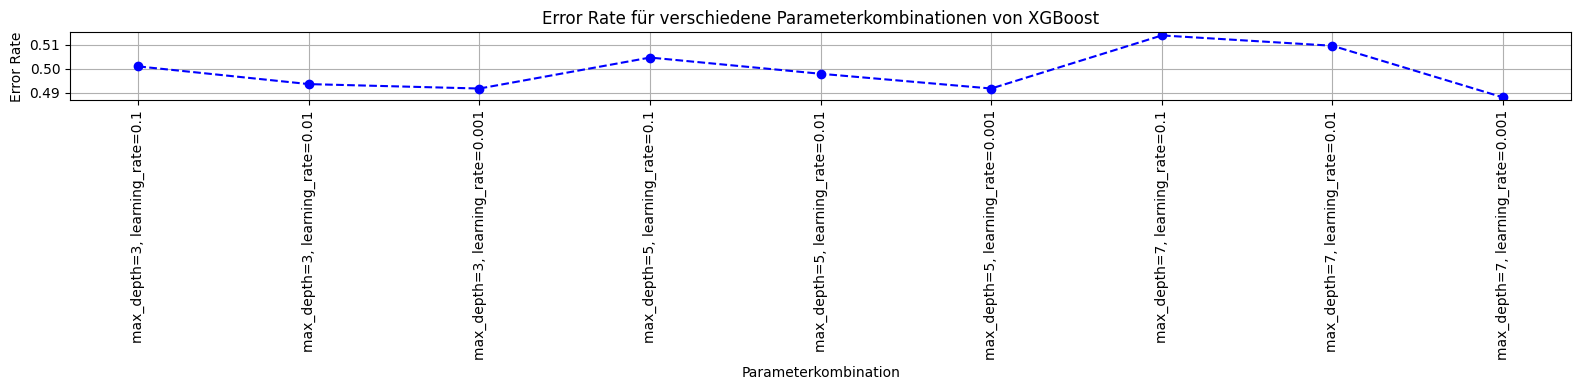

In [ ]:
# Initialisieren Sie eine leere Liste, um die Error-Raten für jede Parameterkombination zu speichern
error_rates = []

# Iterieren Sie über die Booster-Parameter
for max_depth in booster_params['max_depth']:
    for learning_rate in booster_params['learning_rate']:
        # Initialisieren Sie den XGBoost-Klassifikator mit den aktuellen Parametern
        xgb_classifier = xgb.XGBClassifier(max_depth=max_depth, learning_rate=learning_rate)
        
        # Trainieren Sie den Klassifikator auf den Trainingsdaten
        xgb_classifier.fit(X_train, Y_train)
        
        # Machen Sie Vorhersagen auf den Testdaten
        y_pred = xgb_classifier.predict(X_test)
        
        # Berechnen Sie die Error-Rate und speichern Sie sie
        error_rate = 1 - accuracy_score(Y_test, y_pred)
        error_rates.append(error_rate)

# Plot der Error-Rate für jede Parameterkombination
plt.figure(figsize=(16, 4))
plt.plot(range(len(error_rates)), error_rates, marker='o', linestyle='--', color='b')
plt.title('Error Rate für verschiedene Parameterkombinationen von XGBoost')
plt.xlabel('Parameterkombination')
plt.ylabel('Error Rate')

# Setzen der x-Achsen-Beschriftung
plt.xticks(range(len(error_rates)), [f"max_depth={max_depth}, learning_rate={learning_rate}" 
                                      for max_depth in booster_params['max_depth'] 
                                      for learning_rate in booster_params['learning_rate']], rotation=90)

plt.grid(True)
plt.tight_layout()
plt.show()

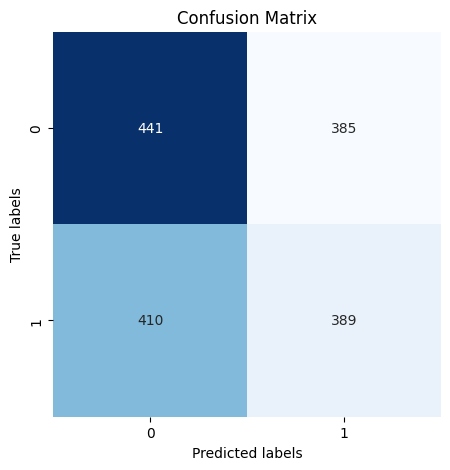

In [ ]:
# --- Initialisieren und Trainieren der logistischen Regression --- #

# Make predictions on the test set
y_pred = logreg.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# --- Hyperparameter-Tuning der logistischen Regression --- #

# Spalten mit kategorialen Daten identifizieren
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Spalten-Transformer erstellen
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Daten transformieren
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialisiere das GridSearchCV-Objekt
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Führe das Hyperparameter-Tuning durch
grid_search.fit(X_train_encoded, Y_train)

# Zeige die besten Hyperparameter an
best_alpha = grid_search.best_params_['C']
print(f"Bestes C: {best_alpha}")

# Vorhersagen auf dem Testset machen
y_pred = grid_search.predict(X_test_encoded)

# Evaluierung des Modells
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error auf dem Testset: {mse}")

Bestes C: 0.001
Mean Squared Error auf dem Testset: 0.4867692307692308


In [ ]:
# Schwellenwert (Threshold) für die Klassenzuweisung festlegen
threshold = 0.1

# Vorhersagen auf dem Testset mit dem festgelegten Schwellenwert machen
y_pred_binary = (y_pred > threshold).astype(int)

# Klassifikationsreport ausgeben
print("Klassifikationsreport:\n")
print(classification_report(Y_test, y_pred_binary))

Klassifikationsreport:

              precision    recall  f1-score   support

           0       0.51      0.92      0.66       826
           1       0.53      0.09      0.15       799

    accuracy                           0.51      1625
   macro avg       0.52      0.51      0.40      1625
weighted avg       0.52      0.51      0.41      1625



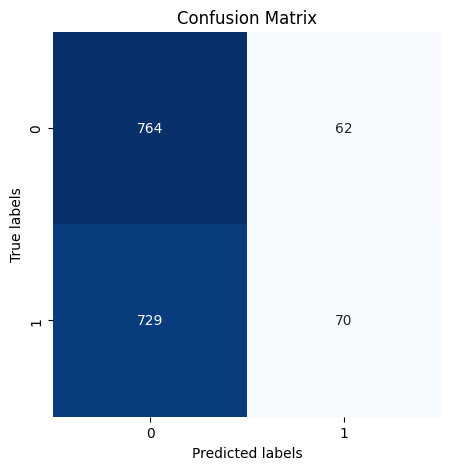

In [ ]:
cm = confusion_matrix(Y_test, y_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

     Random-Forest-Classificator

In [ ]:
# --- Initialisieren und Trainieren des Random Forest-Klassifikators --- #

# Features (X) und Labels (y) extrahieren
X = mushroom_data.drop('class', axis=1)
y = mushroom_data['class']

# Aufteilen des Datensatzes in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Spalten mit kategorialen Daten identifizieren
categorical_columns = X.select_dtypes(include=['object']).columns

# Spalten-Transformer erstellen
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Daten transformieren
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Initialisieren und Trainieren des Random Forest-Klassifikators
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_encoded, y_train)

# Vorhersagen auf den Testdaten machen
y_pred = rf_classifier.predict(X_test_encoded)

# Evaluierung des Modells auf den Testdaten
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Anzeigen der Ergebnisse
print(f'Genauigkeit des Modells: {accuracy:.4f}\n')
print('\nKlassifikationsbericht:')
print(classification_rep)

# Konfusionsmatrix erstellen
cm = confusion_matrix(y_test, y_pred)

Genauigkeit des Modells: 1.0000


Klassifikationsbericht:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



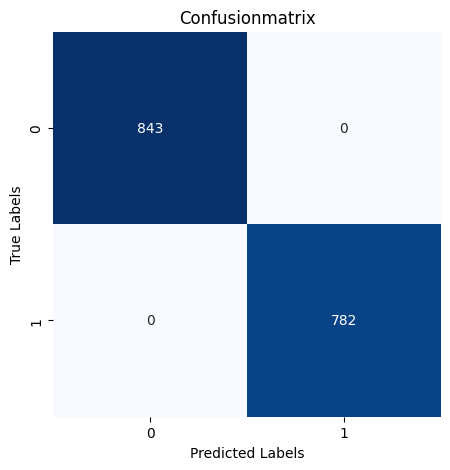

In [ ]:
# Konfusionsmatrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusionmatrix')
plt.show()

    Support-Vector-Machine

In [ ]:
enc_x = OrdinalEncoder()
enc_y = LabelEncoder()

x_train_transf = enc_x.fit_transform(X_train)
x_test_transf = enc_x.transform(X_test)

y_train_transf = enc_y.fit_transform(y_train)
y_test_transf = enc_y.transform(y_test)

scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train_transf)
x_train_rescaled = scaling.transform(x_train_transf)

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(x_train_rescaled, y_train_transf)

y_pred_test = svc.predict(scaling.transform(x_test_transf))

print(classification_report(y_test_transf, y_pred_test, target_names = ["Edible", "Poisonous"]))

              precision    recall  f1-score   support

      Edible       0.96      0.95      0.96       843
   Poisonous       0.95      0.96      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



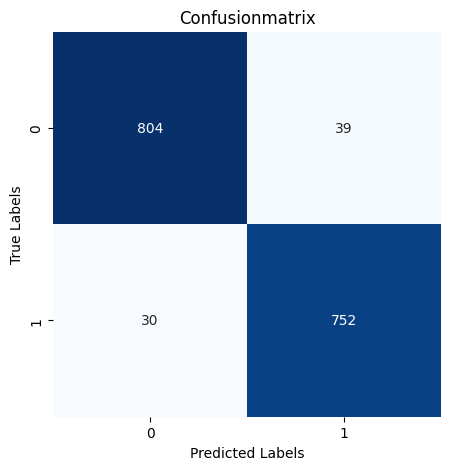

In [ ]:
cm = confusion_matrix(y_test_transf, y_pred_test)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusionmatrix')
plt.show()

    Hypertuning Support-Vector-Machine for precision and recall

In [ ]:
tuned_parameters = [
    {"kernel": ["linear"], "C": [1, 10, 100]},
    {"kernel": ["poly"], "C": [1, 10, 100]},
]

scores = ["precision", "recall"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(x_train_rescaled, y_train_transf)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test_transf, clf.predict(scaling.transform(x_test_transf))
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'kernel': 'poly'}

Grid scores on development set:

0.958 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.982 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.986 (+/-0.013) for {'C': 100, 'kernel': 'linear'}
1.000 (+/-0.000) for {'C': 1, 'kernel': 'poly'}
1.000 (+/-0.000) for {'C': 10, 'kernel': 'poly'}
1.000 (+/-0.000) for {'C': 100, 'kernel': 'poly'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{

    AOC and ROC

In [ ]:
# Erstellen Sie ein synthetisches Datensatz
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Teilen Sie den Datensatz in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definieren und trainieren Sie ein logistisches Regressionsmodell
model = LogisticRegression()
model.fit(X_train, y_train)

# Vorhersagen der Wahrscheinlichkeiten für die positive Klasse
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Berechnen Sie den AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC: {auc:.2f}")


AUC: 0.92


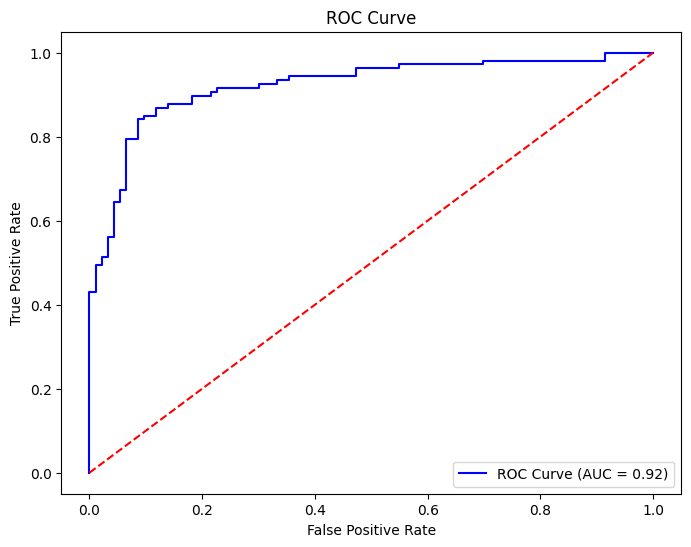

In [ ]:
# Berechnen Sie die ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot der ROC-Kurve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()